# Ridge Regression

**import libraries**

In [19]:
from IPython.display import display

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

from sklearn.feature_selection import SelectKBest, f_regression

**ordinal encoding**

taking categorical variables in a dataset and converting them to numbers: A B C --> 1 2 3. However this creates a ranking problem in some occations when modeling

**One-hot encoding**

taking categorical varialbes in a data set and creating essentually a new binaray 0 1 feature for each category.

In [5]:
df = sns.load_dataset('penguins')
display(df.head())

df['species'].unique()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

### One hot Encoding peguin dataset

The species column values, containing three classes, is now an array of three vectors. In each of the columns we can see there is only one "hot" cell ('1') and the rest are zeros.

In [18]:
species = df.species[:, np.newaxis]
island = df.island[:, np.newaxis]

# Instantiate the encoder as an object
enc = OneHotEncoder(sparse=False)

# Use the fit_transform method (2 steps in 1)
onehot_species = enc.fit_transform(species)
onehot_island = enc.fit_transform(island)

# Display every 25th row
print(onehot_species[::25])

onehot_species = pd.DataFrame(onehot_species)
onehot_island = pd.DataFrame(onehot_island)

df_onehot = pd.concat([onehot_species, onehot_island], axis=1)
print(df_onehot.columns)

df_onehot.head()

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]
Int64Index([0, 1, 2, 0, 1, 2], dtype='int64')


,0,1,2,0,1,2
0,1.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,1.0


### Targeting features

In [21]:
# Load the data into a DataFrame
df = sns.load_dataset("penguins")

# Drop NaNs
df.dropna(inplace=True)

# Create the features matrix
features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm']
X = df[features]

# Create the target array
y = df['body_mass_g']

# Create the training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

**Using SelectKBest**

In [28]:
selector = SelectKBest(score_func=f_regression, k=1)

X_train_selected = selector.fit_transform(X_train, y_train)

selected_masker = selector.get_support()
all_features = X_train.columns
selected_feature = all_features[selected_masker]

print('The selected feature: ', selected_feature[0:2])

The selected feature:  Index(['flipper_length_mm'], dtype='object')


**SelectKBest with encoded features**

we see that some of the encoded features have more importance than the numerical

In [51]:
df = sns.load_dataset('penguins')

species = df.species[:, np.newaxis]
island = df.island[:, np.newaxis]

# Instantiate the encoder as an object
enc = OneHotEncoder(sparse=False)

# Use the fit_transform method (2 steps in 1)
onehot_species = enc.fit_transform(species)
onehot_island = enc.fit_transform(island)

onehot_species = pd.DataFrame(onehot_species, columns=['Adelie', 'Gentoo', 'Chinstrap'])
onehot_island = pd.DataFrame(onehot_island, columns=['Biscoe', 'Dream', 'Torgersen'])

df = pd.concat([df, onehot_species], axis=1)
df = pd.concat([df, onehot_island], axis=1)
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,Adelie,Gentoo,Chinstrap,Biscoe,Dream,Torgersen
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,1.0,0.0,0.0,0.0,0.0,1.0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,1.0,0.0,0.0,0.0,0.0,1.0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,1.0,0.0,0.0,0.0,0.0,1.0
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,1.0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,1.0,0.0,0.0,0.0,0.0,1.0


In [52]:
# Drop NaNs
df.dropna(inplace=True)

# Create the features matrix
features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'Adelie', 'Gentoo', 'Chinstrap', 'Biscoe', 'Dream', 'Torgersen']
X = df[features]

# Create the target array
y = df['body_mass_g']

# Create the training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [62]:
selector = SelectKBest(score_func=f_regression, k=4)

X_train_selected = selector.fit_transform(X_train, y_train)

selected_masker = selector.get_support()
all_features = X_train.columns
selected_feature = all_features[selected_masker]

print('The selected feature: ', selected_feature)

The selected feature:  Index(['bill_length_mm', 'flipper_length_mm', 'Chinstrap', 'Biscoe'], dtype='object')


**Regularization**

The concept of regularization is to reduce variance in a model with a "shrinkage" penalty. A more formal definition of regularization is to add information or bias to prevent overfitting. In regression, there are two common types of regularization: ridge regression and lasso. Ridge regression uses a penalty where the tuning parameter is multiplied by the squared sum of all coefficients (L_2). Lasso regression is similar, but the penalty is a tuning parameter multiplied by the sum of the absolute values of all the coefficients (L_1).

**Ridge Regression**

A regression model determines the parameters that minimize the residual sum of squares (RSS). The basis of ridge regression is to minimize the residual sum of squares (RSS) plus some penalty multiplied by the sum of the squares of the coefficients. The larger the penalty, the more the parameters are penalized, especially large parameters. The penalty or tuning parameter is called both lambda and alpha; lambda means something in Python already, so we'll use alpha for this discussion.

Note: the term "ridge" refers to the shape of the function we are trying to minimize. We turn a ridge into a peak where the parameters that minimize the RSS plus the penalty term are located at this peak.

**Standardization**

Another consideration when using any type of regularization technique is standardization. If the variables are on different scales, the larger variable will have a different contribution to the penalized terms. For example, if we were predicting weight from height, if height is in meters, a change of one unit will be a large change in weight. If height is in a smaller unit like centimeters, a unit change will be a much smaller change in weight.

## Comparing linear/polynomial/ridge regression

In [84]:
import statsmodels.api as sm

np.random.seed(15)
x = 5 * np.random.rand(50)
y = abs(0.5*np.sin(x) + 0.5 * np.random.rand(50))*10

# Create the feature matrix 
X = x[:, np.newaxis]

# Fit a linear regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)

# Create the data for the model (best-fit line)
xfit = np.linspace(0, 5, 1000)
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

BIC ?

In [97]:
# Fit a linear regression with polynomial features
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

poly_model = make_pipeline(PolynomialFeatures(15),
                           LinearRegression())

# Create the data for the model (best-fit line)
poly_model.fit(x[:, np.newaxis], y)
yfit_poly = poly_model.predict(xfit[:, np.newaxis])

In [98]:
# Fit a ridge regression with polynomial features
from sklearn.linear_model import Ridge

ridge_model = make_pipeline(PolynomialFeatures(15),
                           Ridge(normalize=True, alpha=0.05))

ridge_model.fit(x[:, np.newaxis], y)

# Create the data for the model (best-fit line)
yfit_ridge = ridge_model.predict(xfit[:, np.newaxis])

In [119]:
import plotly.express as px
import plotly.graph_objects as go

fig = px.scatter(x=x, y=y, width=800, )
fig.add_trace(go.Scatter(x=xfit, y=yfit,
                    mode='lines',
                    name='Linear Regression'))
fig.add_trace(go.Scatter(x=xfit, y=yfit_poly,
                    mode='lines',
                    name='Linear Regression (Polynomial)'))
fig.add_trace(go.Scatter(x=xfit, y=yfit_ridge,
                    mode='lines',
                    name='Ridge Regression'))

fig.update_yaxes(range=[0, 10])
fig.show()

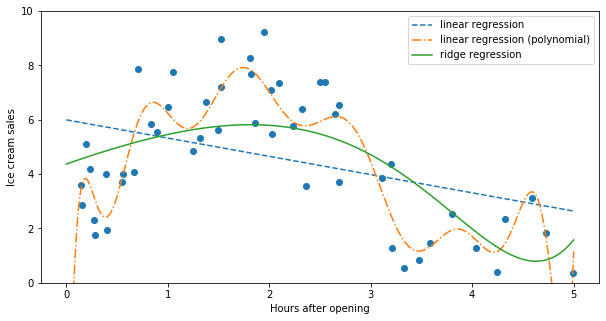

In [99]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(x,y)

ax.plot(xfit, yfit, linestyle='--', label='linear regression')
ax.plot(xfit, yfit_poly, linestyle = '-.', label='linear regression (polynomial)')
ax.plot(xfit, yfit_ridge, label='ridge regression')

ax.set_ylim([0, 10])

ax.set_xlabel('Hours after opening')
ax.set_ylabel('Ice cream sales')
ax.legend();

